### Criar um modelo de regressão linear para prever qual será o Investimento inicial necessário de uma franquia a partir da Taxa Anual cobrado pelo franqueador

#### Regressão linear simples
Ideal existir uma correlação moderada a forte entre as variáveis independentes e dependentes para ter um bom modelo.
Coeficiente de determinação (R²) acima de 0.3.
Resíduos próximo a uma distribuição normal e não seja correlacionados


In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [2]:
# Lendo base de dados estruturada
df = pd.read_csv('../datasets/slr12.csv', sep=';')

In [3]:
# Resumo do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FrqAnual  36 non-null     int64
 1   CusInic   36 non-null     int64
dtypes: int64(2)
memory usage: 704.0 bytes


In [4]:
df.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


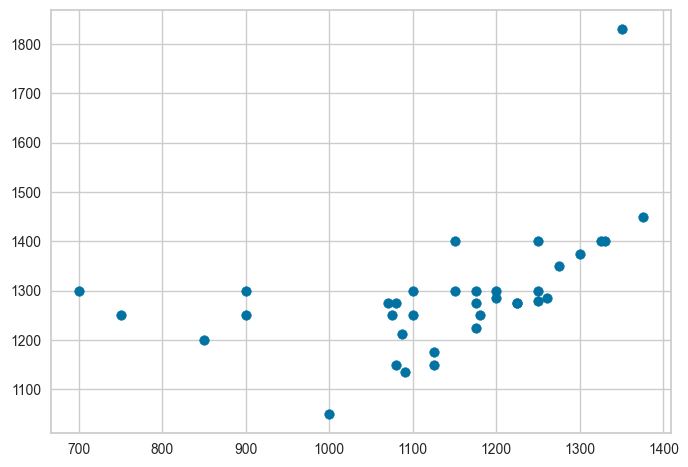

In [5]:
plt.scatter(x=df.FrqAnual, y=df.CusInic)

In [6]:
# Dimensão do dataframe
df.shape

(36, 2)

In [7]:
# Resumo estatísticos variáveis númericas
df.describe()

,FrqAnual,CusInic
count,36.000000,36.000000
mean,1134.777778,1291.055556
std,158.583211,124.058038
min,700.000000,1050.000000
25%,1080.000000,1250.000000
50%,1162.500000,1277.500000
75%,1250.000000,1300.000000
max,1375.000000,1830.000000


In [8]:
# X = df.iloc[:, 0].values
# y = df.iloc[:, 1].values
# type(X)

In [9]:
# Atribuindo variável dependente e independente
X = df['FrqAnual']
y = df['CusInic']

In [10]:
# Correlação variável dependente e independente
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [11]:
# Transformando variável independente em 2D antes de passar ao modelo pois o mesmo espera 2D array
X = X.to_numpy().reshape(-1, 1)

In [12]:
# Instanciando o modelo e passando as variáveis para treinamento
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [13]:
# interceptação no eixo y
modelo.intercept_

867.6042222620558

In [14]:
# inclinação da reta
modelo.coef_

array([0.37315794])

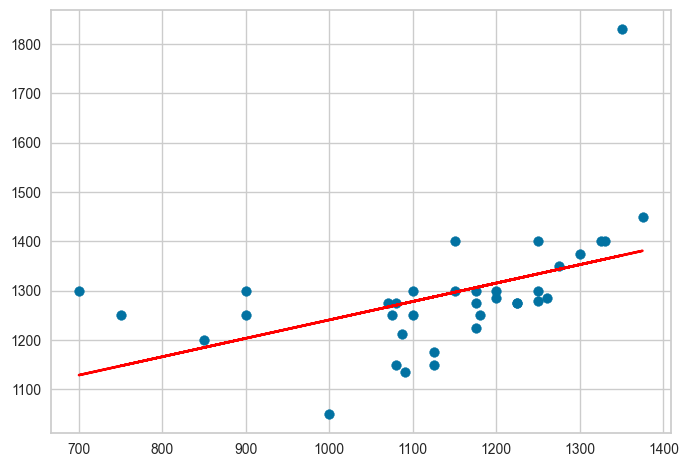

In [15]:
# Pontos reais com a linha de melhor ajuste
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

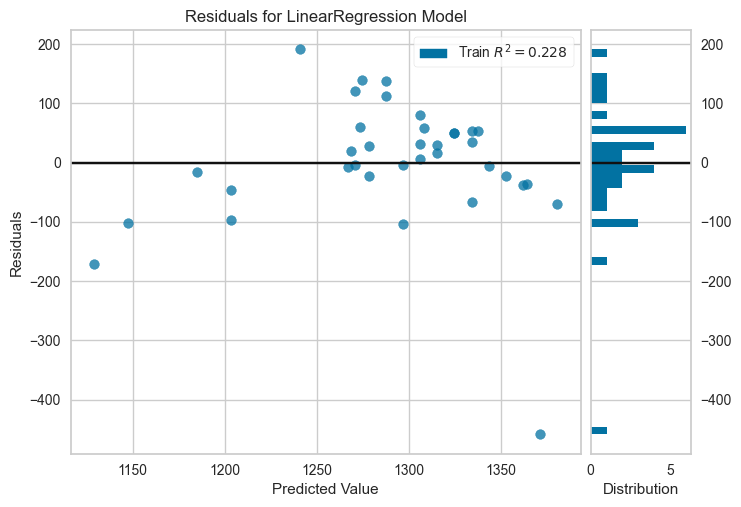

In [16]:
# Visualizando os resíduos
residuos = ResidualsPlot(modelo)
residuos.fit(X, y)
residuos.poof();

In [17]:
# Previsão calculada de forma manual
custo_ini = 1270
modelo.intercept_ + modelo.coef_ * (custo_ini)

array([1341.51480089])

In [18]:
# Previsão usando função do sklearn
modelo.predict([[custo_ini]])

array([1341.51480089])